In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Import PCA from sklearn

In [3]:
# Read your data
data = pd.read_csv('/content/drive/MyDrive/kmeans_data.csv')


In [4]:
data.isnull().sum()

user_id                                                                                                          0
ageinyears                                                                                                       0
gender                                                                                                           0
married                                                                                                          0
has_children                                                                                                     0
home_country                                                                                                     0
Free Hotel meal index (based on Scaled age in years, has children/not, and average discount on booked flights    0
Free Checked Bags perk index ( length of stay and Average Number of Bags Checked )                               0
No Cancellation fee perk index (that included proportion of cancellation and nor

In [5]:
# Select the columns you want to scale
selected_columns = ["Free Hotel meal index (based on Scaled age in years, has children/not, and average discount on booked flights",
                     "Free Checked Bags perk index ( length of stay and Average Number of Bags Checked )",
                     "No Cancellation fee perk index (that included proportion of cancellation and normalised Atbbf)",
                     "1 Night Free Hotel with Flight Perk index",
                     "Exclusive discount perk (Bargain index) includes Scaled ADSPKM and Scaled browsing duration per session"]

In [6]:
# Initialize the StandardScaler
scaler = StandardScaler()


In [7]:
# Fit and transform the scaler on the selected columns
scaled_data = scaler.fit_transform(data[selected_columns])


# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model to your standardized data
kmeans.fit(scaled_data)

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Create a PCA model to reduce data to 2 dimensions (you can choose the number of dimensions)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

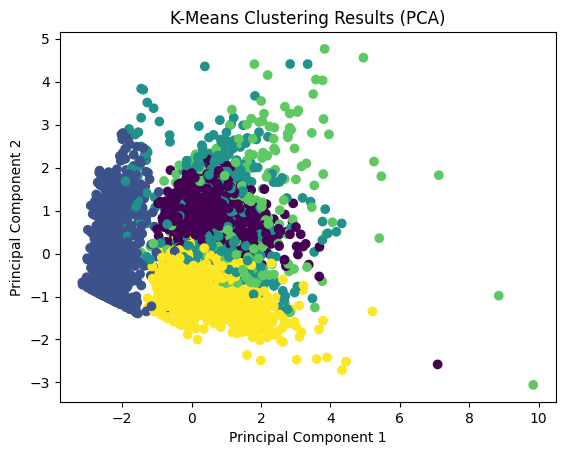

In [8]:
# Visualize the clusters in 2D using the reduced data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results (PCA)')
plt.show()    # Get the cluster centroids
cluster_centers = kmeans.cluster_centers_

In [9]:
# Create a DataFrame to represent cluster centroids
cluster_centers_df = pd.DataFrame(cluster_centers, columns=selected_columns)

In [10]:
# Print or visualize cluster centroids
print(cluster_centers_df)

# Assign cluster labels to your data
data['cluster_label'] = kmeans.predict(scaled_data)

# Calculate mean values for each feature within each cluster
segment_profiles = data.groupby('cluster_label')[selected_columns].mean()

   Free Hotel meal index (based on Scaled age in years, has children/not, and average discount on booked flights  \
0                                           1.395921                                                               
1                                          -0.064952                                                               
2                                          -0.174066                                                               
3                                           0.110379                                                               
4                                          -0.645760                                                               

   Free Checked Bags perk index ( length of stay and Average Number of Bags Checked )  \
0                                          -0.068299                                    
1                                          -0.719490                                    
2                                   

In [11]:
# Print or visualize the segment profiles
print(segment_profiles)

               Free Hotel meal index (based on Scaled age in years, has children/not, and average discount on booked flights  \
cluster_label                                                                                                                  
0                                                       1.386407                                                               
1                                                       0.655429                                                               
2                                                       0.600831                                                               
3                                                       0.743159                                                               
4                                                       0.364809                                                               

               Free Checked Bags perk index ( length of stay and Average Number of Bags Checked )  \
cl

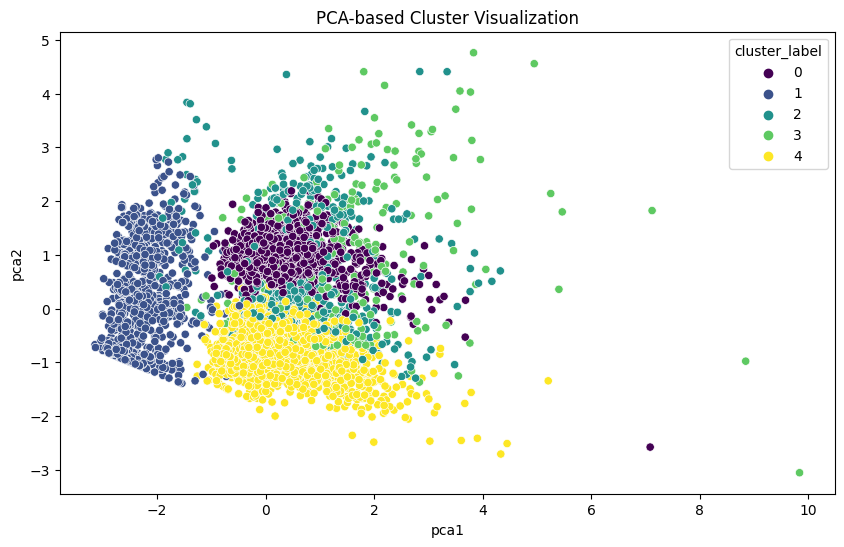

Silhouette Score: 0.3669112036959025
Davies-Bouldin Index: 1.0500961330800487


In [12]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import seaborn as sns

# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_data, data['cluster_label'])

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, data['cluster_label'])

# Visualize clusters using PCA (assuming you have more than 2 features)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
data['pca1'] = pca_result[:, 0]
data['pca2'] = pca_result[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_label', data=data, palette='viridis')
plt.title('PCA-based Cluster Visualization')
plt.show()

# Print validation scores
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")


In [13]:
cluster_counts = data['cluster_label'].value_counts()
print(cluster_counts)


4    2800
0    1394
1     893
2     634
3     277
Name: cluster_label, dtype: int64


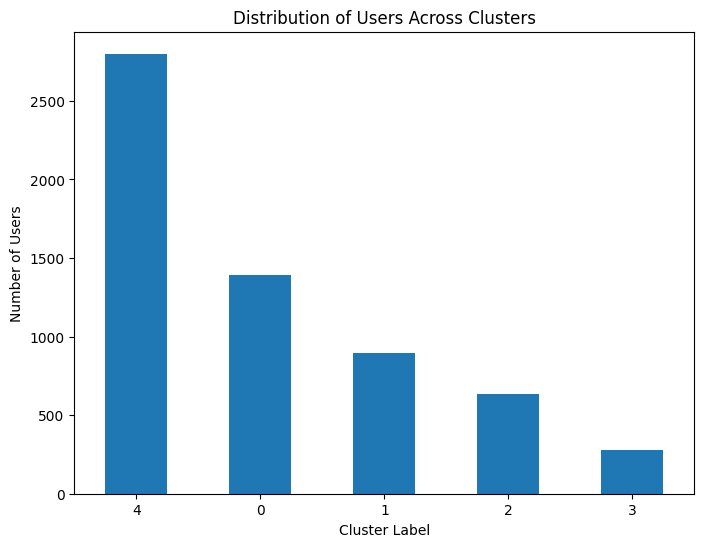

In [14]:
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', rot=0)
plt.xlabel('Cluster Label')
plt.ylabel('Number of Users')
plt.title('Distribution of Users Across Clusters')
plt.show()


In [ ]:
cluster_0_users = data[data['cluster_label'] == 0]
cluster_0_users

,user_id,ageinyears,gender,married,has_children,home_country,"Free Hotel meal index (based on Scaled age in years, has children/not, and average discount on booked flights",Free Checked Bags perk index ( length of stay and Average Number of Bags Checked ),No Cancellation fee perk index (that included proportion of cancellation and normalised Atbbf),1 Night Free Hotel with Flight Perk index,Exclusive discount perk (Bargain index) includes Scaled ADSPKM and Scaled browsing duration per session,cluster_label,pca1,pca2
1,101486,51,F,True,True,usa,1.478873,0.018443,0.976188,0.166667,0.132856,0,0.159709,1.386406
4,118043,51,F,False,True,usa,1.478873,0.195839,0.975546,0.152434,0.178056,0,0.926810,1.452894
5,149058,51,F,False,True,usa,1.488873,0.082045,0.983280,0.066667,0.150505,0,0.307535,1.132896
6,153982,45,F,False,True,canada,1.394366,0.077500,0.975951,0.000000,0.156645,0,0.202519,0.751093
15,252835,38,F,False,True,usa,1.355775,0.121297,0.978004,0.000000,0.136753,0,0.155547,0.812050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,741902,47,F,True,True,canada,1.422535,0.187822,0.983386,0.000000,0.089852,0,-0.012022,1.167070
5986,756434,42,F,False,True,usa,1.352113,0.006989,0.987815,0.166667,0.111994,0,-0.036535,1.219023
5989,767426,36,F,True,True,usa,1.267606,0.106999,0.974120,0.000000,0.072833,0,-0.394812,0.850932
5994,785186,44,F,True,True,usa,1.380282,0.003878,0.990973,0.000000,0.189768,0,0.293132,0.508459


In [ ]:
cluster_1_users = data[data['cluster_label'] == 1]
cluster_1_users

,user_id,ageinyears,gender,married,has_children,home_country,"Free Hotel meal index (based on Scaled age in years, has children/not, and average discount on booked flights",Free Checked Bags perk index ( length of stay and Average Number of Bags Checked ),No Cancellation fee perk index (that included proportion of cancellation and normalised Atbbf),1 Night Free Hotel with Flight Perk index,Exclusive discount perk (Bargain index) includes Scaled ADSPKM and Scaled browsing duration per session,cluster_label,pca1,pca2
7,167852,17,F,False,False,usa,0.000000,0.000000,0.0,0.0,0.038795,1,-2.855372,-0.843950
12,217114,19,O,True,True,usa,1.028169,0.000000,0.0,0.0,0.026921,1,-2.720894,0.916082
13,228195,26,F,False,True,usa,1.126761,0.000000,0.0,0.0,0.094101,1,-2.185851,0.865593
18,298253,46,F,True,True,usa,1.408451,0.364376,0.0,0.0,0.088205,1,-1.253810,1.878253
20,306165,20,F,False,False,usa,0.042254,0.000000,0.0,0.0,0.074663,1,-2.571988,-0.888297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5965,710523,17,F,False,False,canada,0.000000,0.000000,0.0,0.0,0.073382,1,-2.591034,-0.954950
5977,725357,45,F,True,False,usa,0.394366,0.000000,0.0,0.0,0.046115,1,-2.713037,-0.206979
5982,741190,20,F,False,True,canada,1.042254,0.000000,0.0,0.0,0.090218,1,-2.234044,0.736529
5984,743151,33,F,False,True,usa,1.225352,0.000000,0.0,0.0,0.117118,1,-1.988339,0.956839


In [ ]:
cluster_2_users = data[data['cluster_label'] == 2]
cluster_2_users

,user_id,ageinyears,gender,married,has_children,home_country,"Free Hotel meal index (based on Scaled age in years, has children/not, and average discount on booked flights",Free Checked Bags perk index ( length of stay and Average Number of Bags Checked ),No Cancellation fee perk index (that included proportion of cancellation and normalised Atbbf),1 Night Free Hotel with Flight Perk index,Exclusive discount perk (Bargain index) includes Scaled ADSPKM and Scaled browsing duration per session,cluster_label,pca1,pca2
9,181157,53,F,True,False,usa,0.557042,0.186365,0.984866,0.360069,0.244416,2,1.558523,0.303583
28,347778,49,F,False,False,usa,0.450704,0.187088,0.984334,0.250000,0.149082,2,0.630224,0.101125
31,353271,26,F,False,True,usa,1.126761,0.008644,0.986135,0.333333,0.069356,2,-0.142012,1.483793
43,374331,42,M,False,False,usa,0.352113,0.182766,1.492834,0.333333,0.173481,2,1.781844,-0.143843
72,402332,32,F,False,False,usa,0.286268,0.032396,0.962024,0.214310,0.225028,2,0.690659,-0.736323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5925,678547,31,F,False,False,canada,0.197183,0.180877,0.000000,0.442845,0.162135,2,-0.701790,0.683800
5928,679442,43,M,True,False,usa,0.366197,0.198852,0.972190,0.333333,0.120046,2,0.532964,0.326595
5956,700289,70,F,True,False,usa,0.746479,0.000000,0.000000,0.436675,0.050873,2,-1.896161,1.683112
5985,752933,68,F,True,False,usa,0.718310,0.000000,0.333333,0.386547,0.191676,2,-0.340990,0.871476


In [ ]:
cluster_3_users = data[data['cluster_label'] == 3]
cluster_3_users

In [ ]:
cluster_4_users = data[data['cluster_label'] == 4]
cluster_4_users

In [16]:
# Assuming you have a DataFrame 'data' that contains the clustering assignments
# and you want to save it to a CSV file named 'clustered_data.csv'
data.to_csv('Kmeans_clustered_data.csv', index=False)
data.to_csv('/content/drive/MyDrive/Kmeans_clustered_data.csv', index=False)



In [15]:
import pandas as pd
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Load the CSV file into a DataFrame
data2 = pd.read_csv('/content/drive/MyDrive/clustered_data2.csv')

# Assuming you have two columns: 'affinity_perk' and 'kmeans_cluster'
affinity_assignments = data2['affinity_perk']
kmeans_clusters = data2['Kmeans_cluster']

ari = adjusted_rand_score(affinity_assignments, kmeans_clusters)
nmi = normalized_mutual_info_score(affinity_assignments, kmeans_clusters)

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")


Adjusted Rand Index (ARI): 0.17225194370528155
Normalized Mutual Information (NMI): 0.2776281451062402
